In [24]:
# import sqlalchemy
import sqlite3
import pandas as pd

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Connect to SQLite database
connection = sqlite3.connect(r'../data/vivino.db')
# Create a cursor object
cursor = connection.cursor()

## Average wine rating by country

In [27]:
query_wine_ratings_by_country = """
    SELECT countries.code AS code, 
           countries.name AS country_name,  
           ROUND(AVG(wines.ratings_average), 2) AS rating,
           SUM(wines.ratings_count) as ratings_sum
    FROM countries
        JOIN regions ON countries.code = regions.country_code
        JOIN wines ON regions.id = wines.region_id
    GROUP BY code
    ORDER BY country_name ASC
    -- LIMIT 10
    ;
"""
df_wine_ratings_by_country = pd.read_sql_query(query_wine_ratings_by_country, connection)
print(df_wine_ratings_by_country.shape)
display(df_wine_ratings_by_country.head())

(17, 4)


,code,country_name,rating,ratings_sum
0,za,Afrique du Sud,4.46,59995
1,de,Allemagne,4.50,8257
2,ar,Argentine,4.42,283673
3,au,Australie,4.46,52138
4,cl,Chili,4.43,159256


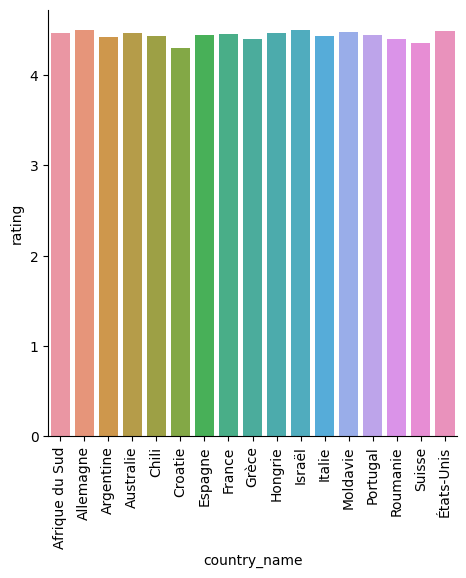

<Figure size 640x480 with 0 Axes>

In [28]:
g1 = sns.catplot(
	x = "country_name",
	y = "rating",
	data = df_wine_ratings_by_country,
	kind = "bar"
)
g1.tick_params(axis="x", rotation=90)
plt.show()
plt.clf()

## Average vintage rating by country

In [29]:
query_vintage_ratings_by_country = """
    SELECT countries.code AS code, 
           countries.name AS country_name,  
           ROUND(AVG(vintages.ratings_average), 2) AS rating,
           SUM(vintages.ratings_count) as ratings_sum
    FROM countries
        JOIN regions ON countries.code = regions.country_code
        JOIN wines ON regions.id = wines.region_id
        JOIN vintages ON wines.id = vintages.wine_id
    GROUP BY code
    ORDER BY country_name ASC
    -- LIMIT 10
    ;
"""
df_vintage_ratings_by_country = pd.read_sql_query(query_vintage_ratings_by_country, connection)
print(df_vintage_ratings_by_country.shape)
display(df_vintage_ratings_by_country.head())

(17, 4)


,code,country_name,rating,ratings_sum
0,za,Afrique du Sud,3.66,5636
1,de,Allemagne,1.70,874
2,ar,Argentine,4.32,16951
3,au,Australie,2.83,3804
4,cl,Chili,4.12,14080


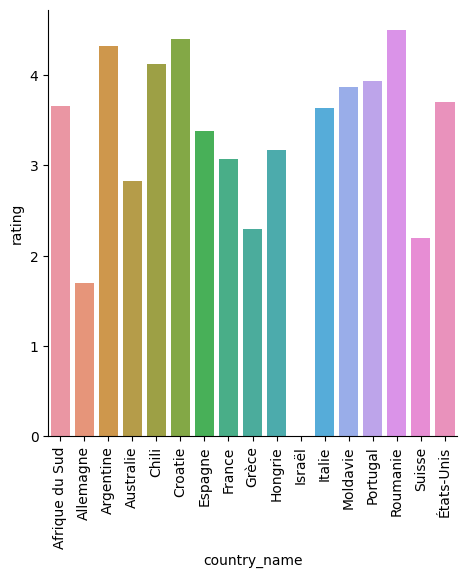

<Figure size 640x480 with 0 Axes>

In [30]:
g2 = sns.catplot(
	x = "country_name",
	y = "rating",
	data = df_vintage_ratings_by_country,
	kind = "bar"
)
g2.tick_params(axis="x", rotation=90)
plt.show()
plt.clf()